# D206 PA code - Doug Haunsperger
### Do initial package import and data read

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('medical_clean.csv')

#view first 5 rows
df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


### Show variable names, non-null counts using `info()`

In [2]:
df.info()
df.isnull().sum()[df.isnull().sum() > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

Series([], dtype: int64)

## Check for duplicate data
First, check for duplicate rows

In [3]:
df.duplicated().value_counts()

False    10000
dtype: int64

Check to see if there are any duplicate `Customer_id` values, perhaps with different data entered

In [4]:
df.duplicated(subset = ['Customer_id'], keep = False).value_counts()

False    10000
dtype: int64

## Check for missing values
Null values already shown in `info()` cell [2] above. Here we will visualize them. In the data treatment section, we will try to determine if the missing values are MAR/MCAR/MNAR.<br>
Code to install package in Jupyter environment taken from Jake VanderPlas (2017).

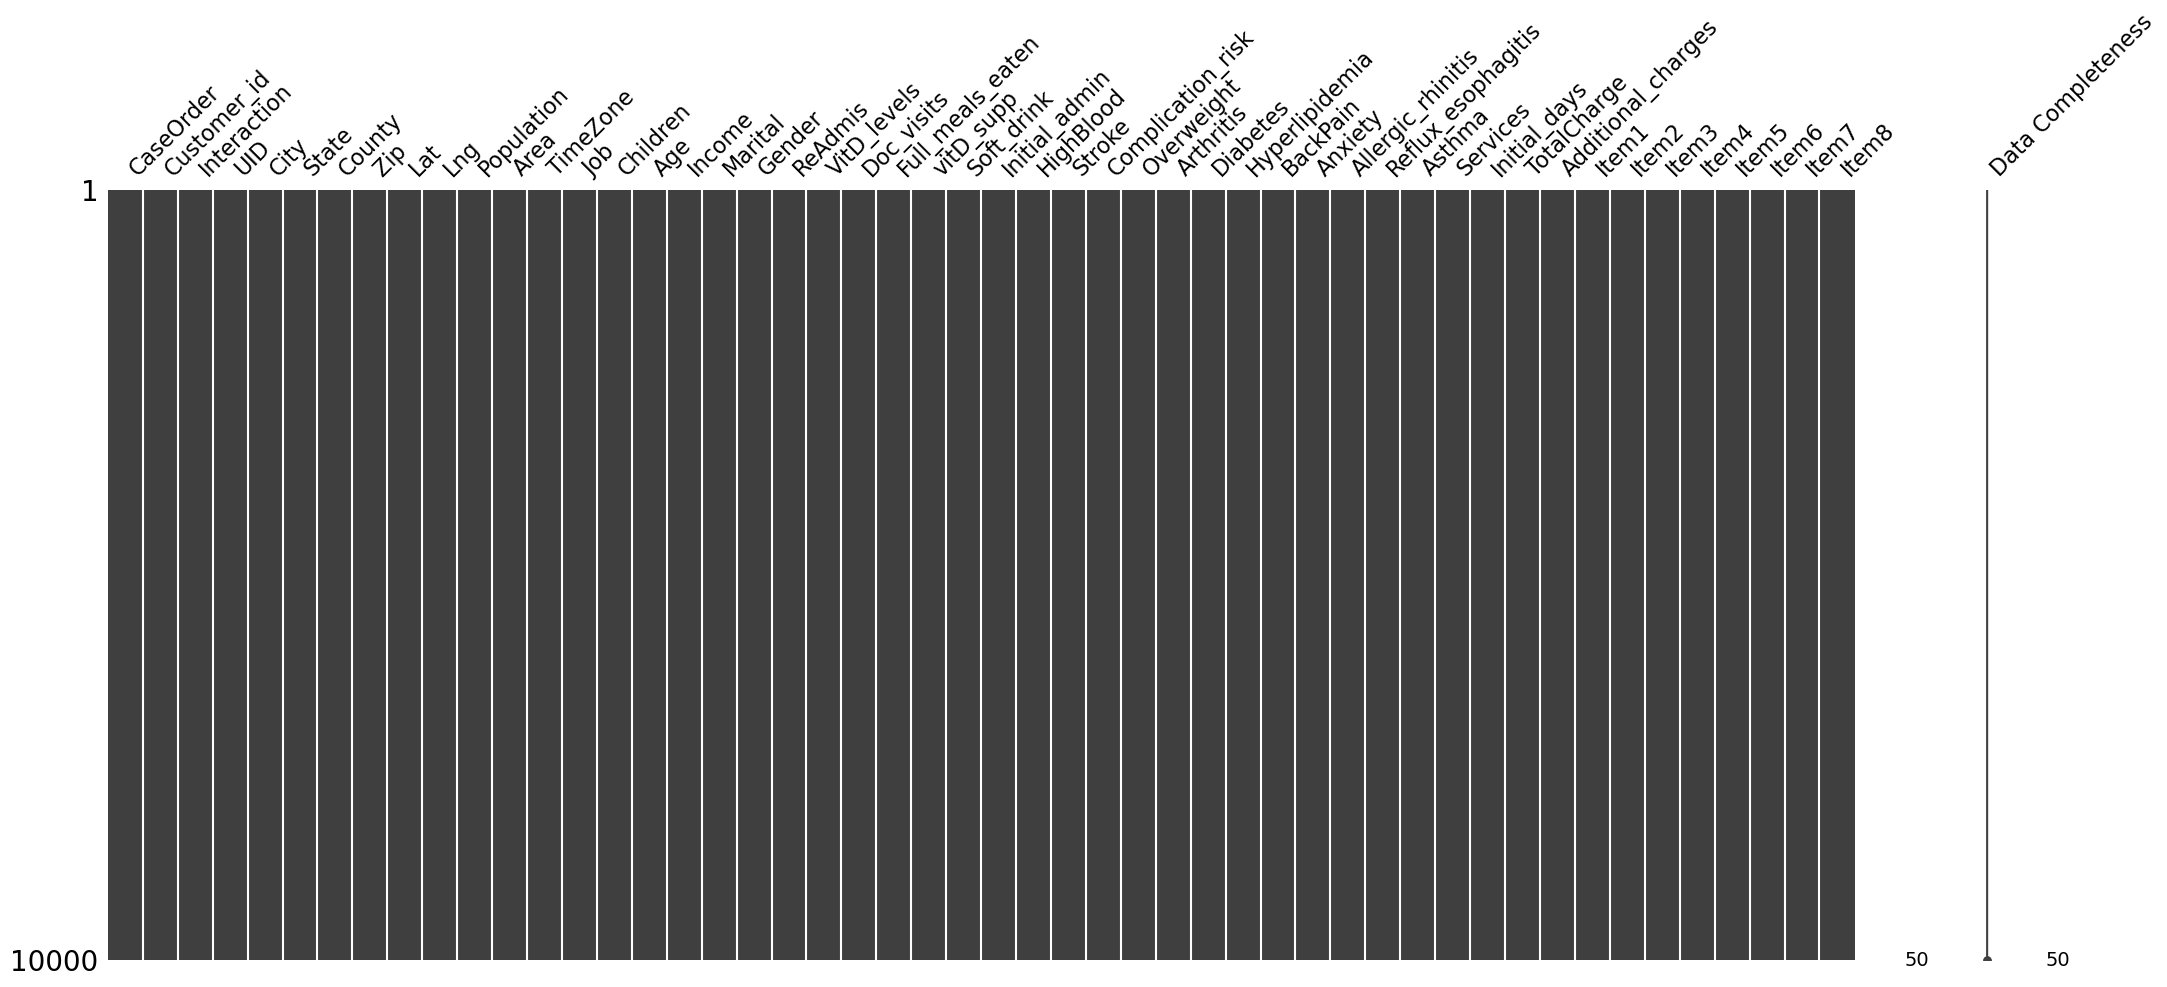

In [5]:
# Install package if needed for environment
# import sys
# !{sys.executable} -m pip install missingno
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df, labels=True) # matrix function turns off labels by default when # columns > 50
# See https://github.com/ResidentMario/missingno/issues/93 (Bilogur, 2019)
plt.show()

We see we have missing values in the columns `Children`, `Age`, `Income`, `Soft_drink`, `Overweight`, `Anxiety`, and `Initial_days`. <br>`Children`, `Age`, `Income`, and `Soft_drink` have the most missing values; each have on the order of 25% of the observations missing.

## Check for outliers

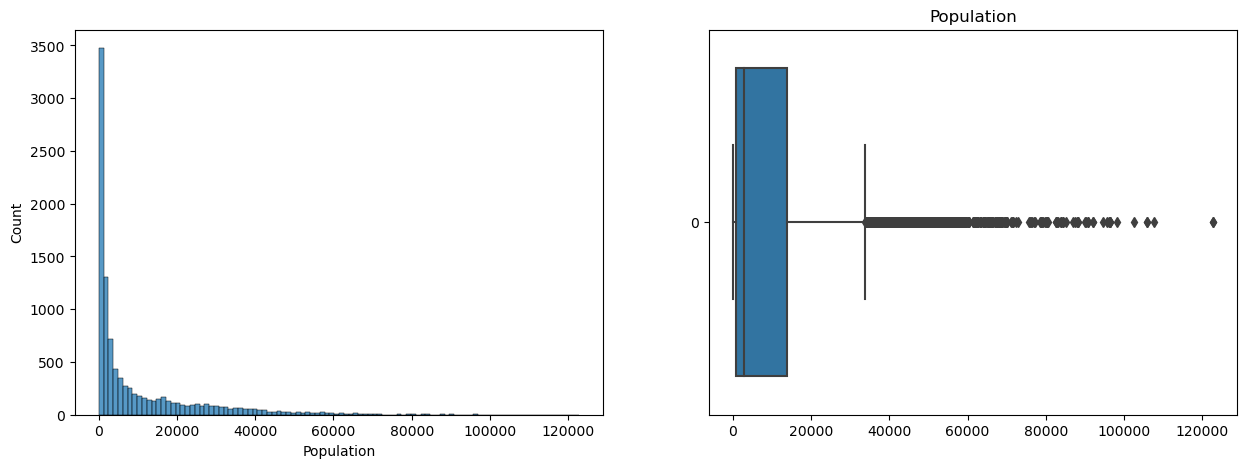

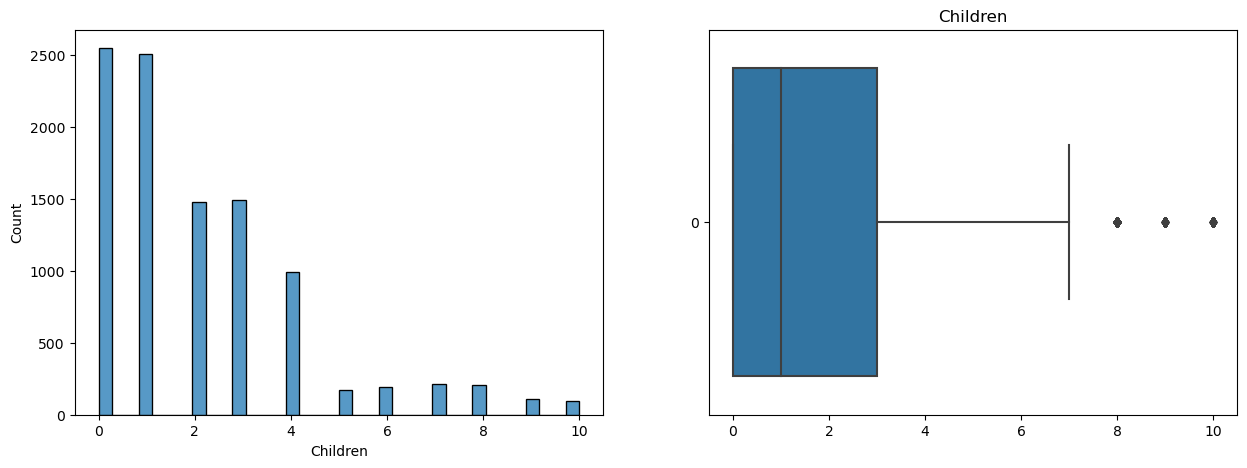

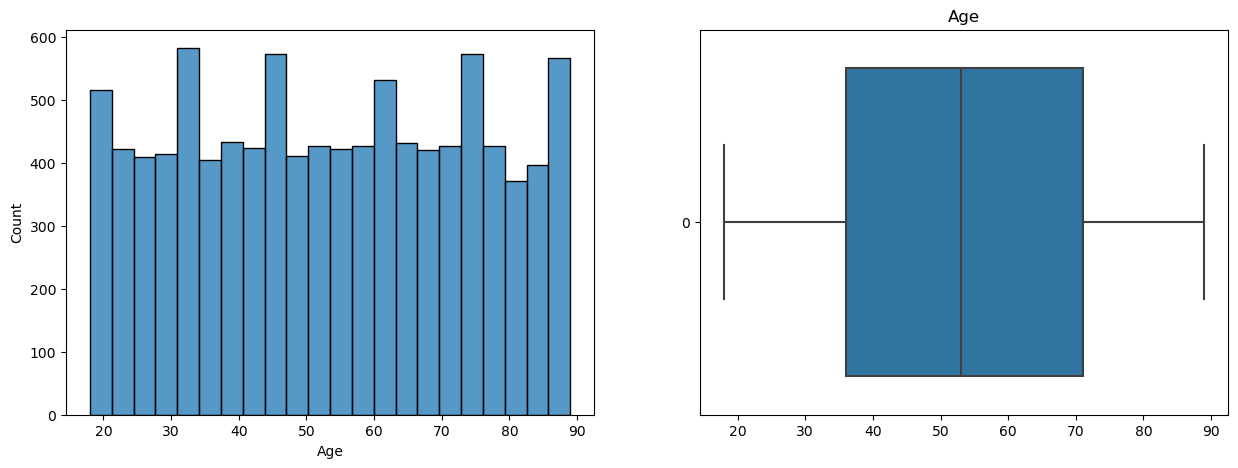

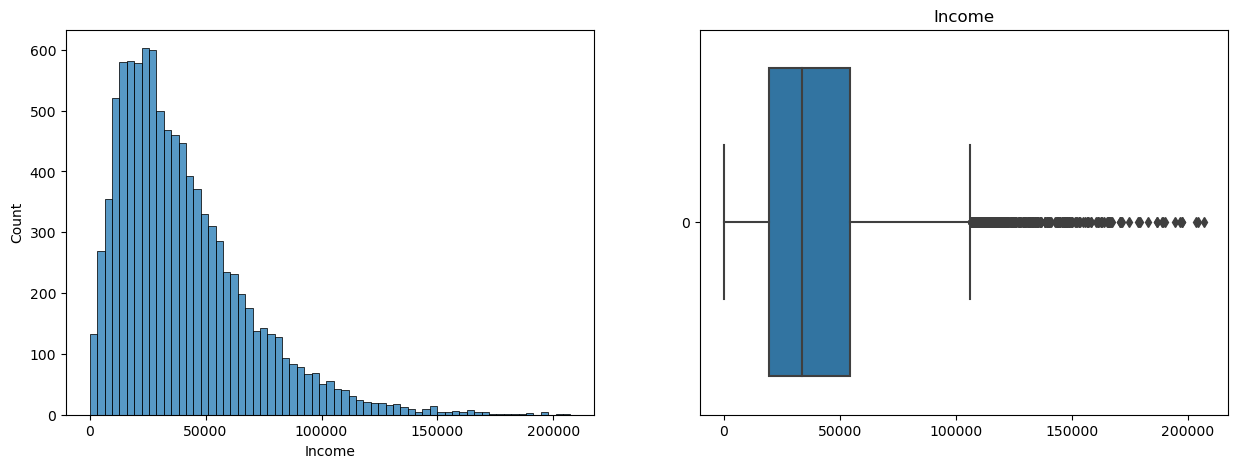

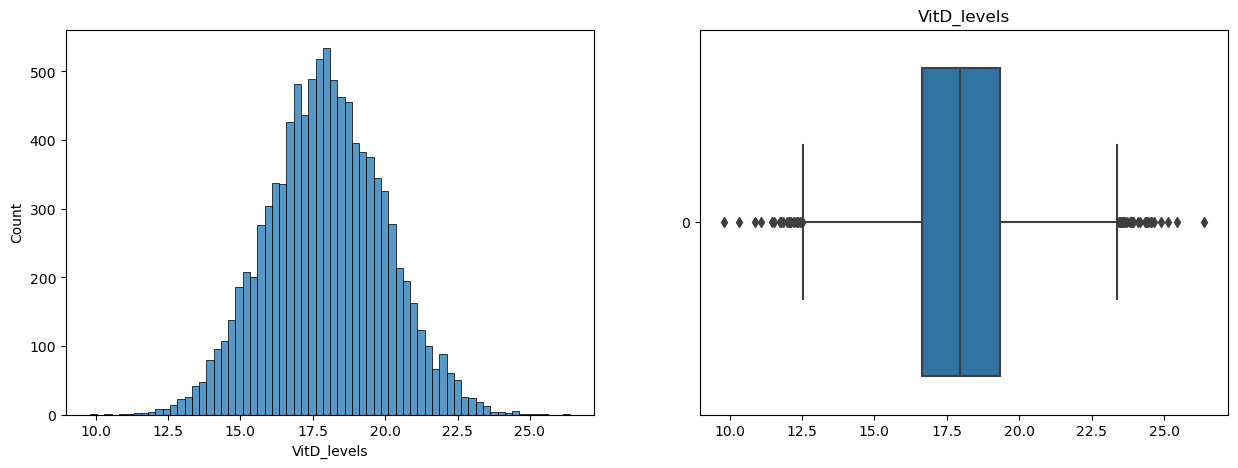

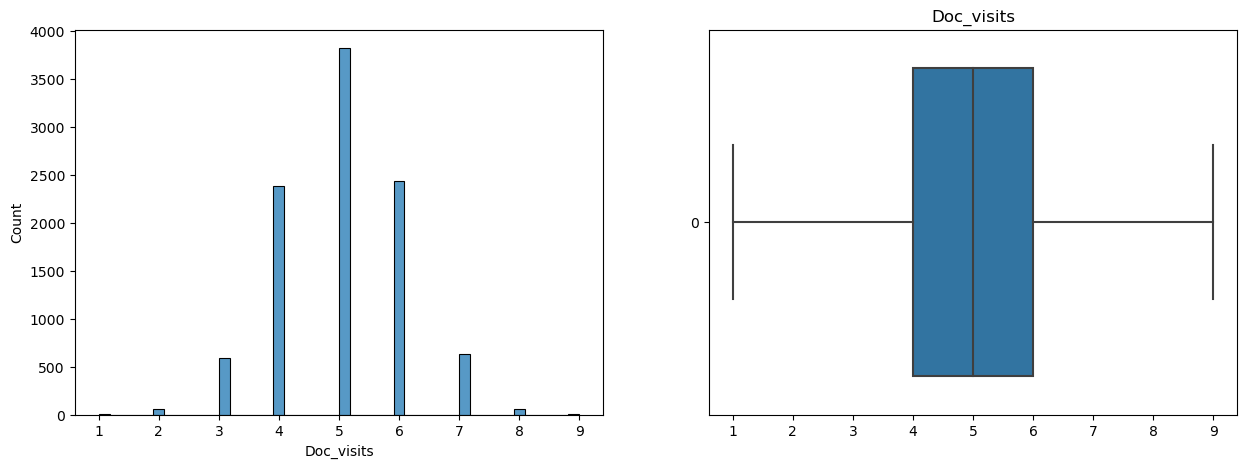

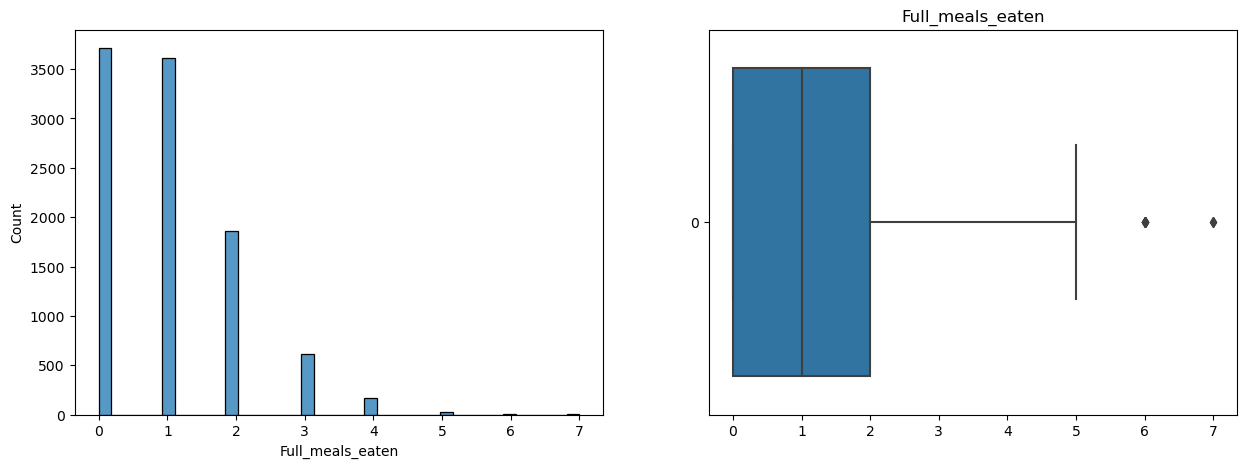

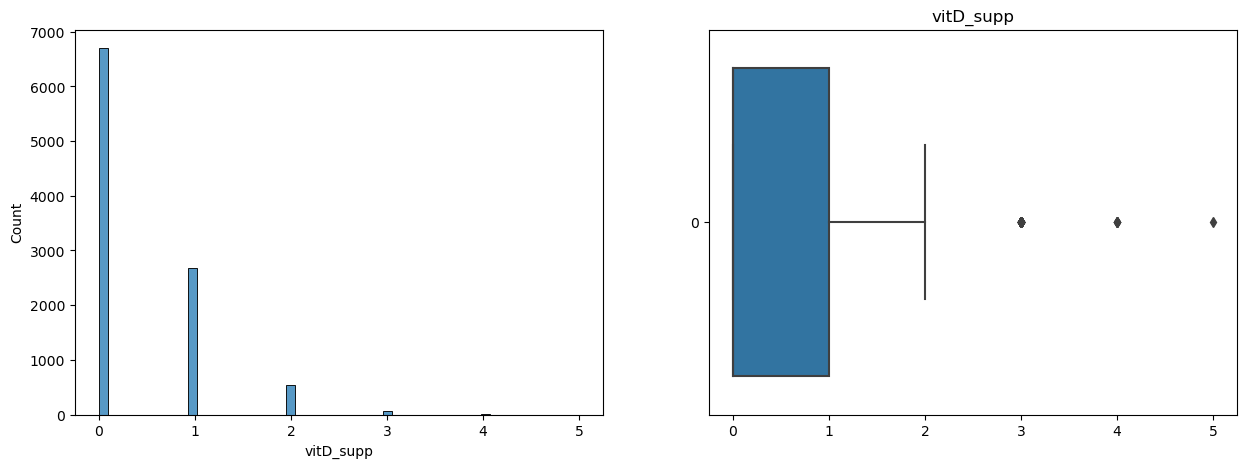

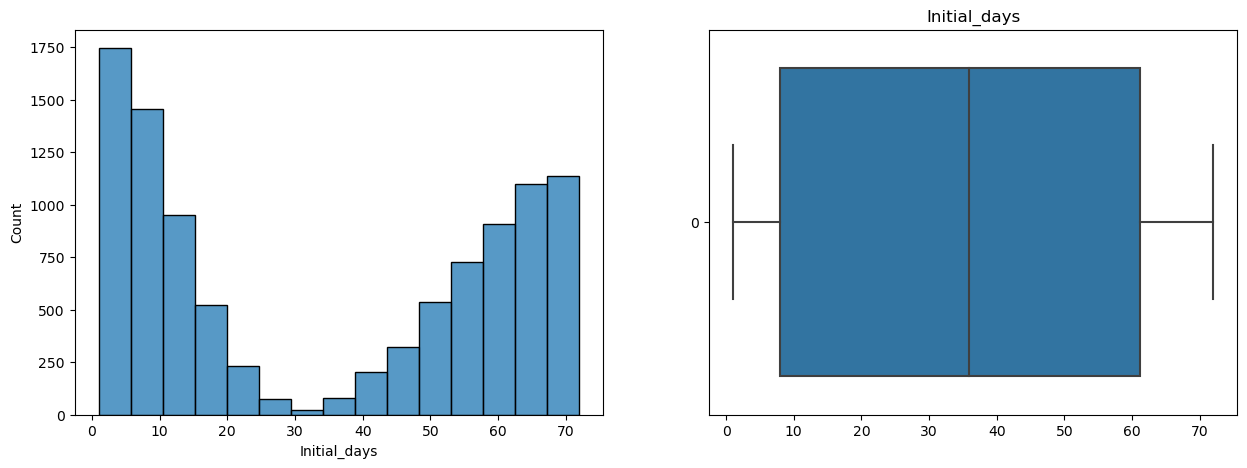

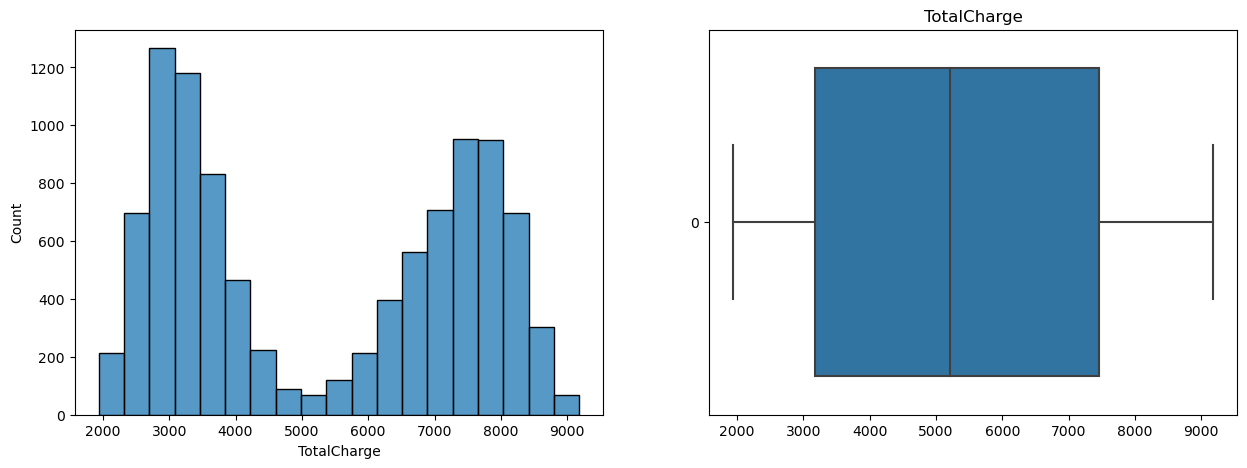

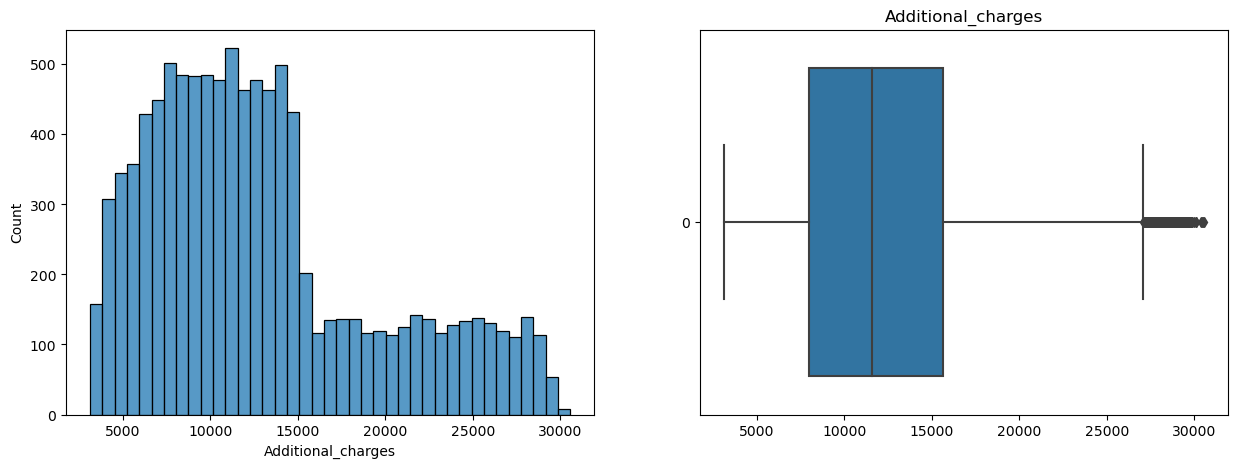

In [7]:
import seaborn
# Choose only the quantitative columns
quant_cols=['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges']

# Ref: https://stackoverflow.com/questions/16392921/make-more-than-one-chart-in-same-ipython-notebook-cell (Kassies, 2013)
for col in quant_cols:
    fig, axs = plt.subplots(1,2, figsize=(15,5))
    seaborn.histplot(df[col], ax=axs[0])
    plt.title(col)
    seaborn.boxplot(df[col], orient='h', ax=axs[1])
    plt.title(col)
    plt.show()

## Re-expressing Categorical Variables

Per the PA Guide, I am ignoring the index/ID/location variables.

In [ ]:
cat_cols = ['Area', 'Education', 'ReAdmis', 'Soft_drink', 'HighBlood', 'Stroke', 'Complication_risk', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 
            'BackPain', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Overweight', 'Anxiety', 'Item1', 'Item2', 'Item3', 'Item4', 
            'Item5', 'Item6', 'Item7', 'Item8']
for col in cat_cols:
    print(df[col].unique())

Set up dictionaries based on the above unique values in the data set. Code adapted from Larose & Larose (2019).

In [ ]:
dict_area = {"Rural": 1, "Suburban": 2, "Urban": 3}
dict_edu = {"No Schooling Completed": 0, "Nursery School to 8th Grade": 8, "9th Grade to 12th Grade, No Diploma": 10, "Regular High School Diploma": 12, 
            "GED or Alternative Credential": 12, "Professional School Degree": 12, "Some College, Less than 1 Year": 12, "Some College, 1 or More Years, No Degree": 13,
            "Associate's Degree": 14, "Bachelor's Degree": 16, "Master's Degree": 18, "Doctorate Degree": 20}
dict_compl = {"Low": 1, "Medium": 2, "High": 3}
dict_yn = {"Yes": 1, "No": 0}
replace_dict = {'Area': dict_area, 'Education': dict_edu, 'ReAdmis': dict_yn, 'Soft_drink': dict_yn, 'HighBlood': dict_yn, 'Stroke': dict_yn, 'Complication_risk':dict_compl, 
                'Arthritis': dict_yn, 'Diabetes': dict_yn, 'Hyperlipidemia': dict_yn, 'BackPain': dict_yn, 'Allergic_rhinitis': dict_yn, 'Reflux_esophagitis': dict_yn, 'Asthma': dict_yn}
# Overweight, Anxiety, and Item[1-8] are already expressed ordinally
# Make copy to keep original df
df_orig = df.copy(deep = True)
df.replace(replace_dict, inplace = True)

Re-check unique vals to make sure all categoricals have been re-expressed

In [ ]:
for col in cat_cols:
    print(df[col].unique())

# Data Cleaning

## Treating Duplicates

#### Drop the duplicated column

In [ ]:
df = df.drop(columns=['Unnamed: 0'])
df.tail(5)

## Treating Outliers

#### Population
See if Population distribution makes sense given Area descriptions

In [ ]:
print(df['Population'].describe())
seaborn.histplot(df.loc[(df['Area'] == 1),['Population']]).set(title='Rural')
plt.show()
seaborn.histplot(df.loc[(df['Area'] == 2),['Population']]).set(title='Suburban')
plt.show()
seaborn.histplot(df.loc[(df['Area'] == 3),['Population']]).set(title='Urban')
plt.show()

In [ ]:
df.loc[(df['Population'] < 100),['Population', 'Area']]

Leaving `Population` outliers in the data set

#### Children

Exclude rows reporting 8 or more children as outliers - move them to a separate data frame. (Middleton, n.d.)

In [ ]:
chil_outliers = df[(df['Children'] >= 8)]
df.drop(df[(df['Children'] >= 8)].index, inplace=True)
df.shape

#### Age

Uniform distribution - no outliers

#### Income

Outlying values are within reason. Income levels of $207,000/year are expected in a population.

In [ ]:
df['Income'].describe()

#### VitD_levels

In [ ]:
print(df.loc[(df['VitD_levels'] > 35), 'VitD_levels'].describe())

print(df.loc[(df['VitD_levels'] < 35), 'VitD_levels'].describe())


In [ ]:
# Scale recorded values above 35 by factor of 2.5 to convert from nmol/L to ng/mL
df['VitD_levels']=np.where(df['VitD_levels'] > 35, df['VitD_levels'] / 2.5, df['VitD_levels'])
print(df.loc[(df['VitD_levels'] > 35), 'VitD_levels'].describe())
print(df.loc[(df['VitD_levels'] < 35), 'VitD_levels'].describe())

The statistical description of the revised `VitD_levels` distribution is very close to the original left-hand (values < 35) distribution.

In [ ]:
col='VitD_levels'
fig, axs = plt.subplots(1,2, figsize=(15,5))
seaborn.histplot(df[col], ax=axs[0])
plt.title(col)
seaborn.boxplot(df[col], orient='h', ax=axs[1])
plt.title(col)
plt.show()

#### Doc_visits

Normal distribution, no outliers

#### Full_meals_eaten

Right-skew distribution. Data dictionary indicates that more than 3 meals per day are sometimes requested by patients, so no need to remove these outliers.

#### Initial_days

Bimodal distribution. No outliers on box plot.

#### TotalCharge

Two disjoint bimodal distributions. I looked at various combinations of variables to explain this and found a correlation between the original faulty `VitD_levels` and the erroneous high `TotalCharge`. The bimodality is correlated to `ReAdmis`.

In [ ]:
seaborn.pairplot(df_orig[['VitD_levels','TotalCharge','ReAdmis']], hue='ReAdmis')

As was done for `VitD_levels`, compare the two halves of the distribution

In [ ]:
print(df.loc[(df['TotalCharge'] > 12000), 'TotalCharge'].describe())

print(df.loc[(df['TotalCharge'] < 12000), 'TotalCharge'].describe())

Shift the upper distribution down by the difference in means

In [ ]:
col='TotalCharge'
meandiff = (df.loc[(df[col] > 12000), col].mean()) - (df.loc[(df[col] < 12000), col].mean())
print(meandiff)

df[col]=np.where(df[col] > 12000, df[col] - meandiff, df[col])

#Check stats for revised distribution
print(df.loc[(df[col] > 12000), col].describe())
print(df.loc[(df[col] < 12000), col].describe())


fig, axs = plt.subplots(1,2, figsize=(15,5))
seaborn.histplot(df[col], ax=axs[0])
plt.title(col)
seaborn.boxplot(df[col], orient='h', ax=axs[1])
plt.title(col)
plt.show()

#### Additional_charges

Interesting relationship between `Age`, `Additional_charges`, and `HighBlood`, but no reason to exclude the outliers.

In [ ]:
# This is a key to distinguish between the population at the top of the Age vs Additional_charges graph and those at the bottom
df['high_line'] = (df['Additional_charges']/(df['Age']+20) > 150)
seaborn.pairplot(df[['Age','Additional_charges','HighBlood','high_line']], hue='high_line')
df.drop('high_line', axis=1, inplace=True)

## Treating Missing Values

I will use MICE (`IterativeImputer`) from the `fancyimputer` package. First I will save a copy of the data frame now that I have removed outliers.
MICE code adapted from DataCamp (Donthi, n.d.).

In [ ]:
df_outl_removed = df.copy(deep=True)

# For MICE technique, only use the part of the dataset with quantitative & ordinal categorical variables
# Reduce dataset to remove survey, ID variables, Job, Employment, Services, Marital, Gender, Initial_admin
dfr = df.iloc[:,14:]
dfr = dfr[[c for c in dfr.columns if not c.startswith('Item')]]
dfr.drop(columns=['Employment', 'Services', 'Marital', 'Gender', 'Initial_admin'], inplace=True)
dfr.info()

In [ ]:
# Install package if needed for environment (Vanderplas, 2017)
#import sys
#!{sys.executable} -m pip install fancyimpute
# MICE code adapted from Datacamp (Donthi, n.d.)
from fancyimpute import IterativeImputer
mice = IterativeImputer()
dfr_mice = dfr.copy(deep=True)
dfr_mice.iloc[:,:] = mice.fit_transform(dfr)

In [ ]:
# The variables with missing values were all encoded as integer - need to round of the float output of MICE
cols_with_missing = ['Children', 'Age', 'Income', 'Soft_drink', 'Overweight', 'Anxiety', 'Initial_days']
dfr_mice[cols_with_missing] = dfr_mice[cols_with_missing].round()

# Some Initial_days values were imputed as negative - clamp to 1 as min value
dfr_mice[dfr_mice['Initial_days'] < 1] = 0
# Clamp minimum age to 20, maximum to 90 to match original data set
dfr_mice[dfr_mice['Age'] < 20] = 20
dfr_mice[dfr_mice['Age'] > 90] = 90

# Copy these back into larger data frame
df[cols_with_missing] = dfr_mice[cols_with_missing]

In [ ]:
# Verify no columns have missing values
df.isna().sum()

In [ ]:
msno.matrix(df, labels=True)

In [ ]:
#Show data histograms / box plots after removal of unwanted outliers and imputation of missing values
for col in quant_cols:
    fig, axs = plt.subplots(1,2, figsize=(15,5))
    seaborn.histplot(df[col], ax=axs[0])
    plt.title(col)
    seaborn.boxplot(df[col], orient='h', ax=axs[1])
    plt.title(col)
    plt.show()

MICE introduced some odd outliers, and it was necessary to clamp output to restrict invalid values. I will also try KNN to see if the output produced is more sane.

In [ ]:
# KNN code adapted from Datacamp (Donthi, n.d.)
from fancyimpute import KNN
knn = KNN()
dfr_knn = dfr.copy(deep=True)
dfr_knn.iloc[:,:] = knn.fit_transform(dfr)

In [ ]:
dfr_knn.head(20)

In [ ]:
# The variables with missing values were all encoded as integer - need to round of the float output of KNN
cols_with_missing = ['Children', 'Age', 'Income', 'Soft_drink', 'Overweight', 'Anxiety', 'Initial_days']
dfr_knn[cols_with_missing] = dfr_knn[cols_with_missing].round()

# Some Initial_days values were imputed as negative - clamp to 1 as min value
#dfr_knn[dfr_knn['Initial_days'] < 1] = 0
# Clamp minimum age to 20, maximum to 90 to match original data set
#dfr_knn[dfr_knn['Age'] < 20] = 20
#dfr_knn[dfr_knn['Age'] > 90] = 90

# Copy these back into larger data frame
df[cols_with_missing] = dfr_knn[cols_with_missing]

In [ ]:
#Show data histograms / box plots after removal of unwanted outliers and imputation of missing values
for col in quant_cols:
    fig, axs = plt.subplots(1,2, figsize=(15,5))
    seaborn.histplot(df[col], ax=axs[0])
    plt.title(col)
    seaborn.boxplot(df[col], orient='h', ax=axs[1])
    plt.title(col)
    plt.show()

Outliers look reasonable, no out-of-bounds data - stay with KNN.

In [ ]:
# Output dataframes to CSV files
df.to_csv('clean_medical_data.csv', index=False)
chil_outliers.to_csv('children_outliers.csv', index=False)

# Principal Component Analysis

Code reference: Datacamp (Boeye, n.d.), WGU Course material (Middleton, n.d., _PCA_)

In [ ]:
# Import packages
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Only work with the 5 continuous quantitative variables, plus the 2 discrete with a large variation (Age, Population)
quant_cols_7 = ['Population', 'Age', 'Income', 'VitD_levels', 'Initial_days', 'TotalCharge', 'Additional_charges']
dfq = df[quant_cols_7]

# Normalize the variables
scaler = StandardScaler()
dfq_std = scaler.fit_transform(dfq)

# Perform PCA
pca = PCA()
pc = pca.fit_transform(dfq_std)

# Start with 7 principal components since there are 7 variables
pc_cols = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7']
pc_df = pd.DataFrame(pc, columns = pc_cols)

# Show explained variance per PC
print(pca.explained_variance_ratio_)

# Show loadings on each PC
loadings = pd.DataFrame(pca.components_, columns = pc_cols, index = dfq.columns)
print(loadings)

In [ ]:
# Code reference: Getting Started with PCA (Middleton, n.d.)

cov_matrix = np.dot(dfq_std.T, dfq_std) / dfq.shape[0]
eigenvals = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

plt.plot(eigenvals)
plt.xlabel('Number of components')
plt.ylabel('Eigenvalue')
plt.axhline (y=1, color='green')
plt.show()

print(eigenvals)
print(pca.explained_variance_ratio_.cumsum())